[View in Colaboratory](https://colab.research.google.com/github/MarcinWylot/CryptocurrencyPricePredictor/blob/master/BitcoinPredictWithLSTM.ipynb)

In [0]:
import requests
import json
import calendar
import random 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error


In [31]:
url = 'https://min-api.cryptocompare.com/data/histohour?tsym=USD&limit=9999&fsym=BTC'
response = requests.get(url)

json_array = json.loads(response.text)

df = pd.DataFrame(json_array['Data'], columns = ['time', 'close', 'high', 'low', 'open', 'volumefrom','volumeto'])
df.set_index('time', inplace=True)
  
df.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
1525914000,9322.61,9362.95,9316.97,9333.25,1854.58,17352355.09
1525917600,9330.94,9331.18,9298.31,9322.58,1805.85,16904633.96
1525921200,9340.05,9342.60,9310.73,9330.94,1334.94,12479835.49
1525924800,9349.58,9364.97,9338.47,9340.28,1138.63,10775828.36
1525928400,9305.56,9363.31,9305.56,9349.58,1318.18,12349480.75


In [32]:
df.shape

(2001, 6)

In [0]:
nb_features = df.shape[1]
window = 5
test_size=0.2
seed=32

neurons = 256 #512                 
activation_function = 'tanh' 
dropout = 0.2 #0.25     
loss = 'mse'                  
optimizer="adam"                    
batch_size = 50               
epochs = 500                                 

In [0]:
def make_features_output(X, seq_len):
  df_s = X.copy()  
  for i in range(seq_len):
    df_s = pd.concat([df_s, X.shift(-(i+1))], axis = 1) 
    
  df_s.dropna(axis=0, inplace=True)
  
  X = df_s.iloc[:,6:]  
  y = df_s.iloc[:,0]
 
  return X, y

In [35]:
X, y  = make_features_output(df, window)
print(X.shape, y.shape)

(1996, 30) (1996,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1596, 30) (400, 30) (1596,) (400,)


In [0]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], window, nb_features)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], window, nb_features)

print(X_train_scaled.shape, X_test_scaled.shape)

(1596, 5, 6) (400, 5, 6)


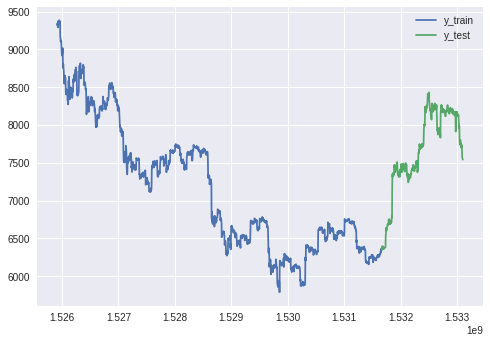

In [39]:
plt.plot(y_train, label='y_train')
plt.plot(y_test, label='y_test')
plt.legend(loc='best')
plt.show()

In [40]:
neurons = 256
dropout = 0.2
batch_size = 50               
epochs = 300   


#neurons = 256
#dropout = 0.2
#batch_size = 50               
#epochs = 500   
#Train Score: 60.03 RMSE
#Test Score: 61.21 RMSE
def nn_model(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
    
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model


#neurons = 256
#dropout = 0.2
#batch_size = 50               
#epochs = 500 
#Train Score: 45.59 RMSE
#Test Score: 33.89 RMSE

#neurons = 512
#Train Score: 35.69 RMSE
#Test Score: 30.33 RMSE
def nn_model2(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
    
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model

#neurons = 512
#Train Score: 21.43412618979657 RMSE
#Test Score: 18.50858981625211 RMSE
def nn_model2a(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(int(neurons/2),kernel_initializer="uniform",activation='relu')) 
  model.add(Dense(int(neurons/2/2),kernel_initializer="uniform",activation='relu')) 
  model.add(Dense(int(neurons/2/2/2),kernel_initializer="uniform",activation='relu'))  
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
    
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model

#neurons = 1024
#epochs=1000
#Train Score: 996.5076229926756 RMSE
#Test Score: 1094.0970262466874 RMSE
def nn_model2b(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(int(neurons/2),kernel_initializer="uniform",activation='relu')) 
  model.add(Dense(int(neurons/2/2),kernel_initializer="uniform",activation='relu')) 
  model.add(Dense(int(neurons/2/2/2),kernel_initializer="uniform",activation='relu')) 
  model.add(Dense(int(neurons/2/2/2/2),kernel_initializer="uniform",activation='relu'))
  model.add(Dense(int(neurons/2/2/2/2/2),kernel_initializer="uniform",activation='relu'))
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
    
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model

#neurons = 512
#epochs=500
#Train Score: 47.77505588203239 RMSE
#Test Score: 68.60233978017233 RMSE

#neurons = 512
#epochs=1000
#Train Score: 29.987862501715316 RMSE
#Test Score: 34.00993998650905 RMSE
def nn_model3(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
    
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model


np.random.seed(seed)
model = nn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 256)            269312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                8224      
__________

In [41]:
model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=0, shuffle=False)

In [42]:
y_train_predictions = pd.Series(model.predict(X_train_scaled)[:,0], index=y_train.index.copy())
y_test_predictions = pd.Series(model.predict(X_test_scaled)[:,0], index=y_test.index.copy())

print("Train Score: {score} RMSE".format(score = mean_squared_error(y_train, y_train_predictions) ** .5 ))

print("Test Score: {score} RMSE".format(score = mean_squared_error(y_test, y_test_predictions) ** .5 ))

Train Score: 103.25489973519919 RMSE
Test Score: 109.83859087423039 RMSE


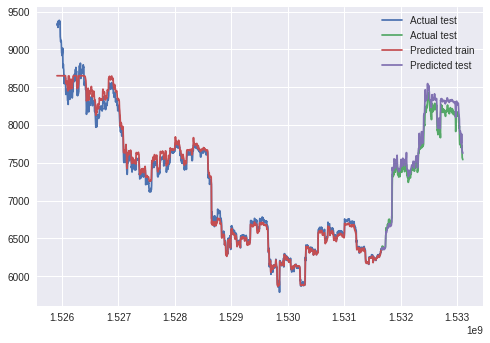

In [43]:
plt.plot(y_train, label='Actual test')
plt.plot(y_test, label='Actual test')
plt.plot(y_train_predictions, label='Predicted train')
plt.plot(y_test_predictions, label='Predicted test')
plt.legend(loc='best')
plt.show()

In [0]:
def make_features_output_backwardsANDforward(X, backwards_window=1, forward_window=1, nb_features=1):
  
  df_s = pd.DataFrame()
  
  for i in range(forward_window):
    df_s = pd.concat([df_s, X.shift(i)], axis = 1) 
#    print(i, df_s.shape)
    
  for i in range(backwards_window):
    df_s = pd.concat([df_s, X.shift(-(i+1))], axis = 1)
#    print(-(i+1), df_s.shape)
    
  
    
  df_s.dropna(axis=0, inplace=True)
  
  X = df_s.iloc[:, forward_window*nb_features:]
  
  y = pd.DataFrame()
  for i in range(0, forward_window*nb_features, nb_features):
         y = pd.concat([y,df_s.iloc[:,i]], axis = 1)
 
  return X, y


In [179]:
window_b = 12
window_f = 2
X, y  = make_features_output_backwardsANDforward(df, window, window_b, nb_features)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape(X_train.shape[0], window, nb_features)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], window, nb_features)
print(X_train_scaled.shape, X_test_scaled.shape)

(1988, 72) (1988, 2)
(1590, 72) (398, 72) (1590, 2) (398, 2)
(1590, 12, 6) (398, 12, 6)


In [0]:
def nn_model_multi(input_shape=(window, nb_features), output_size=1, neurons=neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  model = Sequential()
  
  model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(dropout))
  
  model.add(LSTM(neurons, return_sequences=False))
  model.add(Dropout(dropout))
  
  model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  model.add(Dense(output_size,kernel_initializer="uniform",activation='linear'))
  
  model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
  model.summary()
  return model

In [181]:
model = nn_model_multi(neurons=512, input_shape=(window_b, nb_features), output_size=window_f)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 12, 512)           1062912   
_________________________________________________________________
dropout_69 (Dropout)         (None, 12, 512)           0         
_________________________________________________________________
lstm_70 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 66        
Total params: 3,178,594
Trainable params: 3,178,594
Non-trainable params: 0
_________________________________________________________________


In [182]:
epochs=1000
batch_size=32
model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=0, shuffle=False)

In [187]:
y_train_predictions = pd.DataFrame(model.predict(X_train_scaled), index=y_train.index.copy())
y_test_predictions = pd.DataFrame(model.predict(X_test_scaled), index=y_test.index.copy())

print("Train Score: {score} RMSE".format(score = mean_squared_error (y_train, y_train_predictions) ** .5 ))

print("Test Score: {score} RMSE".format(score = mean_squared_error(y_test, y_test_predictions) ** .5 ))

Train Score: 76.84601266773277 RMSE
Test Score: 77.64940427323654 RMSE


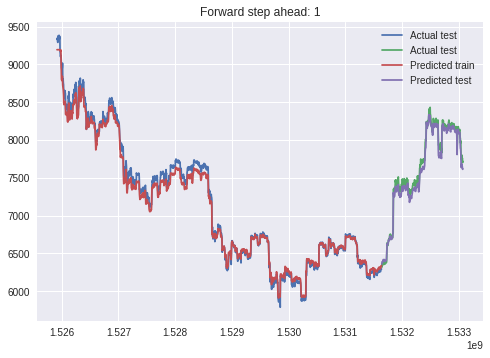

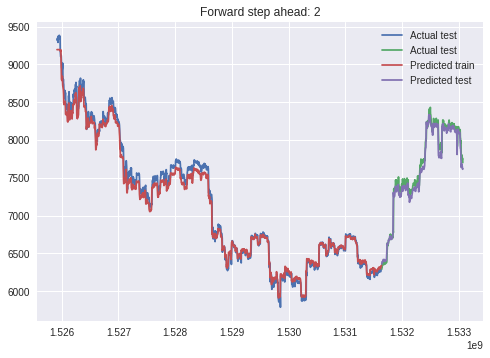

In [186]:
for i in range(window_f):
  plt.plot(y_train.iloc[:,i], label='Actual test')
  plt.plot(y_test.iloc[:,i], label='Actual test')
  plt.plot(y_train_predictions.iloc[:,i], label='Predicted train')
  plt.plot(y_test_predictions.iloc[:,i], label='Predicted test')
  plt.legend(loc='best')
  plt.title('Forward step ahead: {i}'.format(i=i+1))
  plt.show()